In [1]:
from transformers import Blip2Processor, Blip2ForConditionalGeneration

processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b")

# Can generate descriptions that include size information
def get_product_description(image):
    inputs = processor(image, return_tensors="pt")
    generated_ids = model.generate(**inputs, max_length=50)
    description = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return description

/Volumes/Cucumber/Projects/item-identification/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Volumes/Cucumber/Projects/item-identification/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]


In [2]:
image_path = "/Volumes/Cucumber/Projects/datasets/raw/hcmus-iid/train/images/2e40286508d7a274fa0aeb9cc587a24b.jpg"

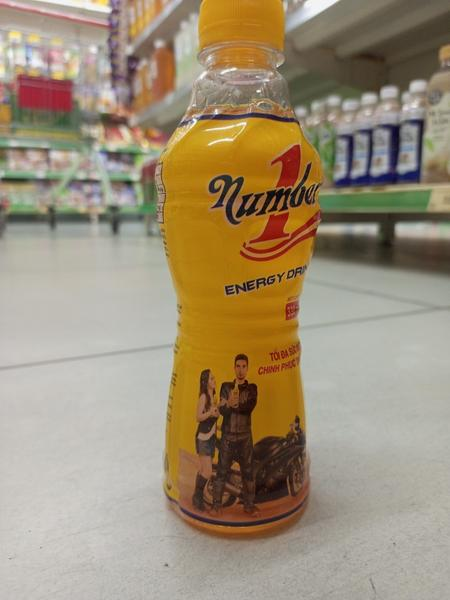

In [5]:
image

In [ ]:

from PIL import Image
image = Image.open(image_path)
get_product_description(image)

'a bottle of namda in a supermarket\n'

In [6]:
import easyocr

In [16]:
ocr_reader_en = easyocr.Reader(['en'])
ocr_reader_vi= easyocr.Reader(['vi'])

In [ ]:
def extract_text_features(image_path):
    # Extract text from image
    results = ocr_reader_en.readtext(image_path)
    text_en = ' '.join([result[1] for result in results])

    results = ocr_reader_vi.readtext(image_path)
    text_vi = ' '.join([result[1] for result in results])
    return {
        "en": text_en,
        "vi": text_vi
    }

In [18]:
image_path = "/Users/keith/Desktop/3b2ee00f21801fdbb3f9e02dc68a1a0b.jpg"

In [19]:
extract_text_features(image_path)

{'en': 'luzeteat LEMON TEA TPPc Lnvnrs',
 'vi': 'lfuzeteat LeMON TEA TPPC Lmininas'}